In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loaddata(filename):
    col_names =["col1","col2","col3","col4","similarity","sen1","sen2"]
    return pd.read_csv(filename, sep= "\t", names=col_names, usecols=["similarity","sen1","sen2"])

train_df= loaddata('sts-train.csv')

Describing the data

In [3]:
print("Diplaying train_df head\n ",train_df.head())
print("Describing the columns of train_df\n", train_df.describe(include='all'))


Diplaying train_df head
     similarity                                           sen1  \
0        5.00                         A plane is taking off.   
1        3.80                A man is playing a large flute.   
2        3.80  A man is spreading shreded cheese on a pizza.   
3        2.60                   Three men are playing chess.   
4        4.25                    A man is playing the cello.   

                                                sen2  
0                        An air plane is taking off.  
1                          A man is playing a flute.  
2  A man is spreading shredded cheese on an uncoo...  
3                         Two men are playing chess.  
4                 A man seated is playing the cello.  
Describing the columns of train_df
          similarity                        sen1                        sen2
count   5711.000000                        5711                        5708
unique          NaN                        5398                        

Checking for null values

In [4]:
print("Checking for null values column wise:\n", train_df.isnull().sum())
print("Checking for total number of null values in the dataframe:\n", train_df.isnull().sum().sum())


Checking for null values column wise:
 similarity    0
sen1          0
sen2          3
dtype: int64
Checking for total number of null values in the dataframe:
 3


Mean of similarity scores

In [5]:
print("Printing the mean of the similarity scores", train_df['similarity'].mean())

Printing the mean of the similarity scores 2.6985430567020376


Frequency of similarity scores

In [6]:
print("Printing the frequency of similarity scores\n ", train_df['similarity'].astype(int).value_counts())
cnt=0
cnt = [cnt+1 for i in train_df['similarity'] if i<0]
print("Checking for negative values in similarity score: ", cnt)

Printing the frequency of similarity scores
  3    1572
4    1132
2     975
0     889
1     878
5     265
Name: similarity, dtype: int64
Checking for negative values in similarity score:  []


Plotting the histogram of similarity scores in train_df

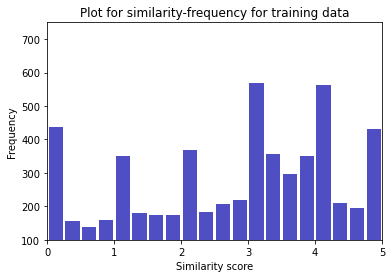

In [7]:
n, bins, patches = plt.hist(train_df["similarity"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Plot for similarity-frequency for training data')
plt.xlim(0, max(train_df['similarity']))
plt.ylim(100, 750)
#plt.grid(True)
plt.show()


In [8]:
train_df.head(5)

,similarity,sen1,sen2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.


In [9]:
train_df = train_df.dropna(subset=["sen1","sen2"])

Importing Contractions

In [11]:
from pycontractions import Contractions
cont = Contractions(api_key="glove-twitter-100")
cont.load_models()

Defining Function for Expanding contractions

In [12]:
def contraction_removal(record):
    global cont
    corrections = list(cont.expand_texts([record["sen1"]], precise=True))
    record["sen1"] = corrections[0]
    corrections = list(cont.expand_texts([record["sen2"]], precise=True))
    record["sen2"] = corrections[0]
    return record

In [13]:
train_df = train_df.apply(contraction_removal,axis=1)

Applying the wrapper function to spell check the words and update the spellings accordingly

In [ ]:
train_df = train_df.apply(spell_check_eng,axis=1)

Importing segmenter function from ekphrasis package


In [ ]:
from ekphrasis.classes.segmenter import Segmenter


Segmenter using the word statistics from english Wikipedia

In [ ]:
seg_eng = Segmenter(corpus="english")

Defining word segmentation function

In [ ]:
def word_segmentation(record):
    global seg_eng
    record["sen1"] = seg_eng.segment(record["sen1"])
    record["sen2"] = seg_eng.segment(record["sen2"])
    return record

In [ ]:
train_df = train_df.apply(word_segmentation, axis = 1)

Defining function to remove punctuations

In [ ]:
def punc_remove_wrapper(record, maxlen=None):
    puncts = [
         ',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&',
        '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
        '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
        '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
        '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
        '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
        '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
        'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
        '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
        '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
    no_punc_sen1 = record["sen1"]
    no_punc_sen2 = record["sen2"]
    for punct in puncts:   
        if punct in record["sen1"] or punct in record["sen2"]:
            no_punc_sen1= no_punc_sen1.replace(punct, '')
            no_punc_sen2 = no_punc_sen2.replace(punct,'')
    record["sen1"] = no_punc_sen1
    record["sen2"] = no_punc_sen2
    return record

In [ ]:
train_df = train_df.apply(punc_remove_wrapper, axis = 1)

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
train_df["sen1"] = train_df["sen1"].apply(lambda x: " ".join([w for w in str(x).lower().split() if w not in stop_words]))
train_df["sen2"] = train_df["sen2"].apply(lambda x: " ".join([w for w in str(x).lower().split() if w not in stop_words]))

In [ ]:
train_df.head(5)

Wrapper function to tokenize data in sentence1 and sentence2

In [ ]:
def tokenize_wrapper(record):
    sen1_tokens = word_tokenize(record["sen1"])
    sen2_tokens = word_tokenize(record["sen2"])
    record["sen1_tokens"]= sen1_tokens
    record["sen2_tokens"] = sen2_tokens
    return record

In [ ]:
train_df["sen1_tokens"] = ""

In [ ]:
train_df["sen2_tokens"] = ""

In [ ]:
train_df = train_df.apply(tokenize_wrapper, axis=1)